In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Function to draw the line
def draw(x1, x2):
  ln = plt.plot(x1, x2)

# Function to calculate sigmoid score
def sigmoid(score):
  return 1/(1 + np.exp(-score))

# Function to calculate the error
def calculate_error(line_parameters, points, y):
  n = points.shape[0]
  # p is the probability of each point being positive
  p = sigmoid(points * line_parameters)
  # Calculation of cross_entropy(error) using the mathematical formula
  cross_entropy = -(1/n) * (np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy

def gradient_descent(line_parameters, points, y , alpha):
  n = points.shape[0]
  for i in range(2000):
    p = sigmoid(points * line_parameters)
    gradient = points.T * (p-y) * (alpha/n)
    line_parameters = line_parameters - gradient
    
    w1 = line_parameters.item(0)
    w2 = line_parameters.item(1)
    b = line_parameters.item(2)
    
    x1 = np.array([points[:,0].min(), points[:,0].max()])
    x2 = -b/w2 + (x1 * (-w1/w2))
  draw(x1, x2)

In [7]:
# No. of points in each region(top + bottom), i.e. A total of 200 points.
n_pts = 100
# Set a random state and not randomise on each execution which may results in different points.
np.random.seed(0)
# Bias value which will be multiplied with the intercept(b).
bias = np.ones(n_pts)
# Red Points. Generating random points in the top region(red). Shape - (100, 3).
# On x-axis(x1), 10 is the central value and 2 is the deviation on either side(left and right).
# Similarly, On y-axis(x2), 12 is the central value and 2 is the deviation on either side(up and down).
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
# Blue Points. Generating random points in the bottom region(blue). Shape - (100, 3) .
# On x-axis(x1), 5 is the central value and 2 is the deviation on either side(left and right).
# Similarly, On y-axis(x2), 6 is the central value and 2 is the deviation on either side(up and down).
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
# Combined array of red and blue points. Shape - (200, 3)
all_points = np.vstack((top_region, bottom_region))
# Matrix containing w1, w1 and b. Shape - (3, 1)
line_parameters = np.matrix([np.zeros(3)]).T
# # Storing minimum and maximum values on the x-axis(x1) from the array of points to draw an initial line.
# x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
# # Calculating values on the y-axis(x2) corresponding to that of x1 above.
# x2 = -b/w2 + (x1 * (-w1/w2))
# y contains the labels which are used to denote the red and blue points. 1 represents blue points. 0 represents red points.
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

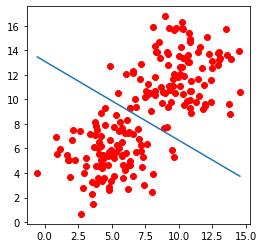

In [10]:
# Multiplying the data points with their weights. Shape - (200, 1)
linear_combination = all_points*line_parameters
# Calculating sigmoid value of each linear_combination. Shape - (200, 1)
probabilities = sigmoid(linear_combination)  
_, ax= plt.subplots(figsize = (4, 4))
# Plotting the top-region points in red color
ax.scatter(top_region[:, 0], top_region[:, 1], color = 'r')
# Plotting the bottom-region points in blue color
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color = 'b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()